# Understanding League of Legends Win Conditions
*by Ankush Bharadwaj*

### Problem
League of Legends is a complicated game involving many different factors that could play into whether or not a team wins a game. To that extent, can I implement a machine learning model that predicts whether or not a game will result in a win or loss, and can this model be used to understand which factors are most crucial for a team to win a game of League of Legends?

## Generate DataFrame of Matches
First, I will scrape the [100 top summoners](https://www.leagueofgraphs.com/rankings/summoners/na) from the [top 5 most popular regions](https://www.statista.com/statistics/711469/league-of-legends-lol-player-distribution-by-region/). Then, I will connect to the Riot API using the [Python Riot-Watcher](https://github.com/pseudonym117/Riot-Watcher) package, and, through a series of loops, generate a dataframe of roughly 10,000 rows. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('Success.')

Success.


In [3]:
import re
from requests_html import HTMLSession
session = HTMLSession()
print('Success.')

Success.


In [4]:
def pull_summoner_names(url, start_tag, end_tag):
    website_string = session.get(url).html.html
    
    start_indices = [m.start() for m in re.finditer(start_tag, website_string)]
    end_indices = [m.start() for m in re.finditer(end_tag, website_string)]
    
    if (len(start_indices) != len(end_indices)):
        return('List lengths do not match.')
    
    result = [website_string[(start_indices[i]+len(start_tag)):(end_indices[i])] for i in range(0,100)]
    return(result)

In [5]:
url = 'https://www.leagueofgraphs.com/rankings/summoners/{}'
regions = ['na', 'br', 'kr', 'euw', 'eune']
start_tag = '<span class="name">'
end_tag = '</span>\n                                        <br/>\n'

top_summoners = dict()

for region in regions:
    top_summoners[region] = pull_summoner_names(url.format(region),start_tag,end_tag)

summoners = pd.DataFrame(top_summoners)
summoners

,na,br,kr,euw,eune
0,C9 Zven,xiaolongbao,DWG ShowMaker,Agurin,Litny
1,Palafox,Aryze,T1 BurdoI,Legendary Manaty,UnExpecteDGanGS
2,qpalzmwoiaj,C0ME BACK HOME,mars8,RGE lnspired,Kits&ugrave;ne
3,Ssumdayday,v f N b,개똥벌레a,Elyoyaaa,Scarlet Rose
4,C9 ZVENNN,VK Hidan,owoowoowoowoowo,SUP Armutke,EXSEMI
...,...,...,...,...,...
95,Cazamareas,Scavange,ZED99,Juhozkin,Atmo
96,PIux,RNG m1ng,xiaozhabi,RoseLMonster,I Doom Warrior I
97,MentaIIy strong,fvckk,군밤갓,MRS JaVa&aacute;a,Liam Nees&omicron;n
98,DrewDozer,esA,Keine1,RGE3,MkdPro123


In [6]:
from riotwatcher import LolWatcher

lol_watcher = LolWatcher('app-api-here')
print('Success.')

Success.


In [7]:
summoners.columns = ['na1', 'br1', 'kr', 'euw1', 'eun1']
summoners

,na1,br1,kr,euw1,eun1
0,C9 Zven,xiaolongbao,DWG ShowMaker,Agurin,Litny
1,Palafox,Aryze,T1 BurdoI,Legendary Manaty,UnExpecteDGanGS
2,qpalzmwoiaj,C0ME BACK HOME,mars8,RGE lnspired,Kits&ugrave;ne
3,Ssumdayday,v f N b,개똥벌레a,Elyoyaaa,Scarlet Rose
4,C9 ZVENNN,VK Hidan,owoowoowoowoowo,SUP Armutke,EXSEMI
...,...,...,...,...,...
95,Cazamareas,Scavange,ZED99,Juhozkin,Atmo
96,PIux,RNG m1ng,xiaozhabi,RoseLMonster,I Doom Warrior I
97,MentaIIy strong,fvckk,군밤갓,MRS JaVa&aacute;a,Liam Nees&omicron;n
98,DrewDozer,esA,Keine1,RGE3,MkdPro123


In [8]:
def account_id_for_col(region, column):
    temp_list = []
    
    for summoner in column:
        try:
            temp_list.append(lol_watcher.summoner.by_name(region, summoner)['accountId'])
        except:
            print('Error for {}'.format(summoner))
            temp_list.append(np.nan)
        
    return(temp_list)
print('Success.')

Success.


In [9]:
print('NA1')
summoners['na1_account_id'] = account_id_for_col('na1', summoners.na1)
print('\nBR1')
summoners['br1_account_id'] = account_id_for_col('br1', summoners.br1)
print('\nKR')
summoners['kr_account_id'] = account_id_for_col('kr', summoners.kr)
print('\nEUW1')
summoners['euw1_account_id'] = account_id_for_col('euw1', summoners.euw1)
print('\nEUN1')
summoners['eun1_account_id'] = account_id_for_col('eun1', summoners.eun1)

NA1
Error for Ne&oslash;&oslash;
Error for j1h&ugrave;1V
Error for Veni vidi vic&igrave;

BR1
Error for o&atilde;geN olavaC
Error for doutor keio
Error for Tr&iuml;go
Error for DE BR&Uuml;YNE 17
Error for Para&igrave;so
Error for Qu&igrave;nn
Error for Gord&atilde;o1000Grau

KR

EUW1
Error for Raz&oslash;rk Activoo
Error for Rob&iacute;nh00D
Error for D&eacute;adly
Error for Mj&ouml;llnir Abuser
Error for Kang Seung I&omicron;k
Error for FNC N&ecirc;mesis
Error for zo&iacute;r
Error for pr1me&eacute;
Error for Legendary Ch&oslash;vy
Error for Tigriuk&eacute;
Error for MRS X&iacute;co
Error for c&oslash;cky movement
Error for K&oslash;ldo Locuraa
Error for Elyoy&alpha;
Error for MRS JaVa&aacute;a

EUN1
Error for Kits&ugrave;ne
Error for Gaarf&igrave;eld
Error for H&eacute;tzer
Error for L&upsilon;ci&fnof;er
Error for &Eta;obbi
Error for M&aelig;stro
Error for &Mu;&Lambda;TI
Error for Humorn&iacute;ček
Error for Mart&omicron;
Error for Luxur&iacute;a
Error for Liam Nees&omicron;n


In [10]:
match_columns = ['teamId', 'win', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald', 'towerKills',
       'inhibitorKills', 'baronKills', 'dragonKills', 'vilemawKills',
       'riftHeraldKills', 'dominionVictoryScore', 'bans', 'region']
match_df = pd.DataFrame(columns = match_columns)
match_df

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,region


In [11]:
account_id_columns = ['na1_account_id', 'br1_account_id', 'kr_account_id', 'euw1_account_id', 'eun1_account_id']

for column in account_id_columns:
    
    current_column = summoners[column]
    current_region = column.split('_')[0]
    print('Starting {}....'.format(current_region))
    
    for index in range(0,100):
        
        if type(summoners[column].iloc[index]) == float:
            print('Skipping index {}, column {} because nan value.'.format(index, column))
            continue
            
        try:    
            temp_game_ids = [game['gameId'] for game in lol_watcher.match.matchlist_by_account(current_region, summoners[column].iloc[index])['matches']]
        except:
            print('Skipping games at index {}, column {}.'.format(index, column))
            continue
        
        for gameid in temp_game_ids[:10]:
            try:
                temp_df = pd.DataFrame(lol_watcher.match.by_id(current_region, gameid)['teams'])
                temp_df['region'] = [current_region] * len(temp_df)
                match_df = pd.concat([match_df, temp_df], sort = False)
            except:
                print('Skipping game at index {}, column {}'.format(index, column))
                continue
    print('Finished {}'.format(current_region))
    print('Current length of dataframe: {}\n'.format(len(match_df)))

Starting na1....
Skipping index 10, column na1_account_id because nan value.
Skipping index 42, column na1_account_id because nan value.
Skipping game at index 49, column na1_account_id
Skipping index 58, column na1_account_id because nan value.
Finished na1
Current length of dataframe: 1938

Starting br1....
Skipping game at index 17, column br1_account_id
Skipping game at index 27, column br1_account_id
Skipping index 33, column br1_account_id because nan value.
Skipping game at index 40, column br1_account_id
Skipping game at index 42, column br1_account_id
Skipping index 47, column br1_account_id because nan value.
Skipping index 52, column br1_account_id because nan value.
Skipping game at index 58, column br1_account_id
Skipping index 63, column br1_account_id because nan value.
Skipping index 68, column br1_account_id because nan value.
Skipping index 76, column br1_account_id because nan value.
Skipping index 84, column br1_account_id because nan value.
Finished br1
Current len

In [12]:
match_df.head(10)

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,region
0,100,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': 245, 'pickTurn': 1}, {'champio...",na1
1,200,Win,True,True,False,False,True,False,1,0,0,2,0,0,0,"[{'championId': 777, 'pickTurn': 6}, {'champio...",na1
0,100,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': 7, 'pickTurn': 1}, {'championI...",na1
1,200,Win,True,True,True,False,True,True,8,1,0,2,0,1,0,"[{'championId': 777, 'pickTurn': 6}, {'champio...",na1
0,100,Win,True,True,True,False,True,False,10,2,0,1,0,0,0,"[{'championId': 777, 'pickTurn': 1}, {'champio...",na1
1,200,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,"[{'championId': 104, 'pickTurn': 6}, {'champio...",na1
0,100,Win,True,True,False,True,True,True,4,0,1,2,0,1,0,"[{'championId': 58, 'pickTurn': 1}, {'champion...",na1
1,200,Fail,False,False,False,False,False,False,0,0,0,1,0,0,0,"[{'championId': 777, 'pickTurn': 6}, {'champio...",na1
0,100,Win,True,False,False,True,False,False,6,0,1,2,0,0,0,"[{'championId': 37, 'pickTurn': 1}, {'champion...",na1
1,200,Fail,False,True,False,False,True,True,4,0,0,3,0,1,0,"[{'championId': 107, 'pickTurn': 6}, {'champio...",na1


In [14]:
match_df['win'] = match_df['win'].map({'Win': 1, 'Fail': 0})
match_df['firstBlood'] = match_df['firstBlood'].astype(int)
match_df['firstTower'] = match_df['firstTower'].astype(int)
match_df['firstInhibitor'] = match_df['firstInhibitor'].astype(int)
match_df['firstBaron'] = match_df['firstBaron'].astype(int)
match_df['firstDragon'] = match_df['firstDragon'].astype(int)
match_df['firstRiftHerald'] = match_df['firstRiftHerald'].astype(int)
match_df.head(10)

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans,region
0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[{'championId': 245, 'pickTurn': 1}, {'champio...",na1
1,200,1,1,1,0,0,1,0,1,0,0,2,0,0,0,"[{'championId': 777, 'pickTurn': 6}, {'champio...",na1
0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[{'championId': 7, 'pickTurn': 1}, {'championI...",na1
1,200,1,1,1,1,0,1,1,8,1,0,2,0,1,0,"[{'championId': 777, 'pickTurn': 6}, {'champio...",na1
0,100,1,1,1,1,0,1,0,10,2,0,1,0,0,0,"[{'championId': 777, 'pickTurn': 1}, {'champio...",na1
1,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[{'championId': 104, 'pickTurn': 6}, {'champio...",na1
0,100,1,1,1,0,1,1,1,4,0,1,2,0,1,0,"[{'championId': 58, 'pickTurn': 1}, {'champion...",na1
1,200,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[{'championId': 777, 'pickTurn': 6}, {'champio...",na1
0,100,1,1,0,0,1,0,0,6,0,1,2,0,0,0,"[{'championId': 37, 'pickTurn': 1}, {'champion...",na1
1,200,0,0,1,0,0,1,1,4,0,0,3,0,1,0,"[{'championId': 107, 'pickTurn': 6}, {'champio...",na1


In [15]:
match_df.drop(['vilemawKills', 'dominionVictoryScore', 'bans', 'teamId'], axis = 1, inplace = True)
match_df.head(10)

,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,region
0,0,0,0,0,0,0,0,0,0,0,0,0,na1
1,1,1,1,0,0,1,0,1,0,0,2,0,na1
0,0,0,0,0,0,0,0,0,0,0,0,0,na1
1,1,1,1,1,0,1,1,8,1,0,2,1,na1
0,1,1,1,1,0,1,0,10,2,0,1,0,na1
1,0,0,0,0,0,0,0,0,0,0,0,0,na1
0,1,1,1,0,1,1,1,4,0,1,2,1,na1
1,0,0,0,0,0,0,0,0,0,0,1,0,na1
0,1,1,0,0,1,0,0,6,0,1,2,0,na1
1,0,0,1,0,0,1,1,4,0,0,3,1,na1


In [16]:
match_df.reset_index(inplace = True)
match_df.head(10)

,index,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,region
0,0,0,0,0,0,0,0,0,0,0,0,0,0,na1
1,1,1,1,1,0,0,1,0,1,0,0,2,0,na1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,na1
3,1,1,1,1,1,0,1,1,8,1,0,2,1,na1
4,0,1,1,1,1,0,1,0,10,2,0,1,0,na1
5,1,0,0,0,0,0,0,0,0,0,0,0,0,na1
6,0,1,1,1,0,1,1,1,4,0,1,2,1,na1
7,1,0,0,0,0,0,0,0,0,0,0,1,0,na1
8,0,1,1,0,0,1,0,0,6,0,1,2,0,na1
9,1,0,0,1,0,0,1,1,4,0,0,3,1,na1


In [17]:
match_df.drop(['index'], axis = 1, inplace = True)
match_df.head(10)

,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,region
0,0,0,0,0,0,0,0,0,0,0,0,0,na1
1,1,1,1,0,0,1,0,1,0,0,2,0,na1
2,0,0,0,0,0,0,0,0,0,0,0,0,na1
3,1,1,1,1,0,1,1,8,1,0,2,1,na1
4,1,1,1,1,0,1,0,10,2,0,1,0,na1
5,0,0,0,0,0,0,0,0,0,0,0,0,na1
6,1,1,1,0,1,1,1,4,0,1,2,1,na1
7,0,0,0,0,0,0,0,0,0,0,1,0,na1
8,1,1,0,0,1,0,0,6,0,1,2,0,na1
9,0,0,1,0,0,1,1,4,0,0,3,1,na1


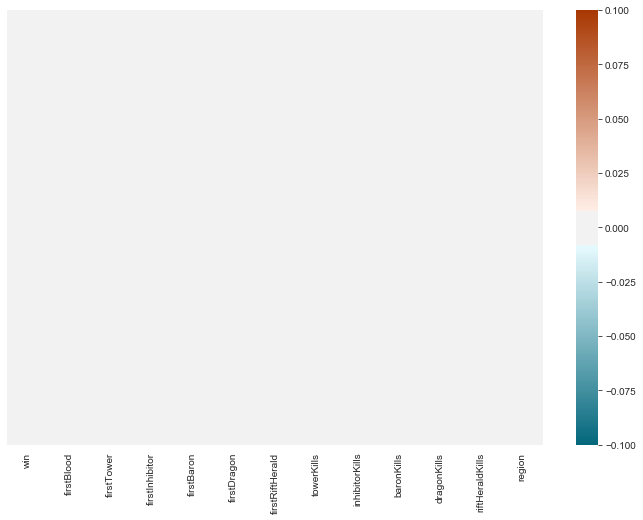

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,8))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 

sns.heatmap(match_df.isna(), cmap = cmap, yticklabels = False)

In [19]:
match_df.to_csv('matches.csv')
match_df.describe()

,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
count,9226.000000,9226.000000,9226.000000,9226.000000,9226.00000,9226.000000,9226.000000
mean,0.500000,0.499566,0.496206,0.388142,0.27726,0.439627,0.439302
std,0.500027,0.500027,0.500013,0.487354,0.44767,0.496369,0.496329
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [20]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9226 entries, 0 to 9225
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   win              9226 non-null   int64 
 1   firstBlood       9226 non-null   int64 
 2   firstTower       9226 non-null   int64 
 3   firstInhibitor   9226 non-null   int64 
 4   firstBaron       9226 non-null   int64 
 5   firstDragon      9226 non-null   int64 
 6   firstRiftHerald  9226 non-null   int64 
 7   towerKills       9226 non-null   object
 8   inhibitorKills   9226 non-null   object
 9   baronKills       9226 non-null   object
 10  dragonKills      9226 non-null   object
 11  riftHeraldKills  9226 non-null   object
 12  region           9226 non-null   object
dtypes: int64(7), object(6)
memory usage: 937.1+ KB


In [23]:
match_df[['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']] = match_df[['towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'riftHeraldKills']].astype(int)
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9226 entries, 0 to 9225
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   win              9226 non-null   int64 
 1   firstBlood       9226 non-null   int64 
 2   firstTower       9226 non-null   int64 
 3   firstInhibitor   9226 non-null   int64 
 4   firstBaron       9226 non-null   int64 
 5   firstDragon      9226 non-null   int64 
 6   firstRiftHerald  9226 non-null   int64 
 7   towerKills       9226 non-null   int64 
 8   inhibitorKills   9226 non-null   int64 
 9   baronKills       9226 non-null   int64 
 10  dragonKills      9226 non-null   int64 
 11  riftHeraldKills  9226 non-null   int64 
 12  region           9226 non-null   object
dtypes: int64(12), object(1)
memory usage: 937.1+ KB


In [24]:
match_df.to_csv('matches.csv')
match_df.describe()

,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills
count,9226.000000,9226.000000,9226.000000,9226.000000,9226.00000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000
mean,0.500000,0.499566,0.496206,0.388142,0.27726,0.439627,0.439302,4.611207,0.684587,0.363971,1.554195,0.700087
std,0.500027,0.500027,0.500013,0.487354,0.44767,0.496369,0.496329,3.413101,0.957761,0.583586,1.340606,0.738059
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,8.000000,1.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,11.000000,7.000000,3.000000,5.000000,2.000000


## Exploratory Data Analysis

Now, I will perform my Exploratory Data Analysis. First, I will see the proportion of won games where the winning team had First Blood, First Tower, First Inhibitor, First Baron, and First Dragon. Next, I will visualize the correlation between all the columns, first overall, then for each region to see if there's any variation between regions. Finally, I will perform a Principal Component Analysis on the data to see if there are any obvious patterns in the relevance of each column to the variance in my data.

In [31]:
(match_df.groupby(['win']).sum().iloc[1]/(match_df.groupby(['win']).sum().iloc[1]+match_df.groupby(['win']).sum().iloc[0]))[:5]

firstBlood        0.588848
firstTower        0.702490
firstInhibitor    0.913432
firstBaron        0.802189
firstDragon       0.629684
dtype: float64

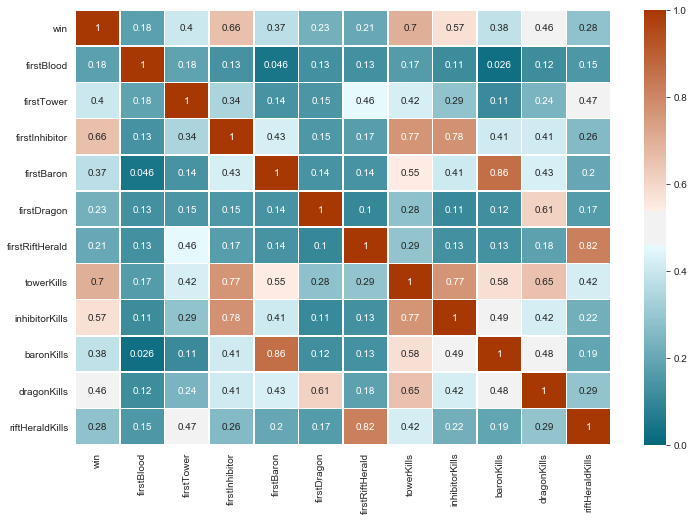

In [38]:
plt.figure(figsize = (12,8))

cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap(match_df.drop(['region'], axis = 1).corr(), vmin = 0, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')

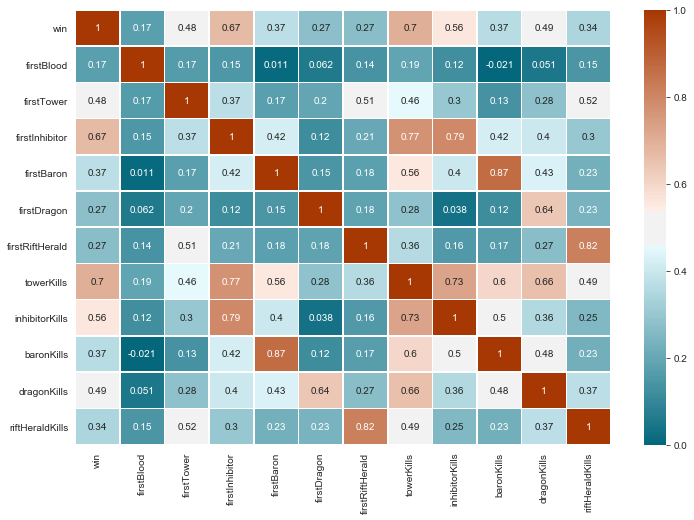

In [39]:
plt.figure(figsize = (12,8))
sns.heatmap(match_df[match_df.region == 'na1'].drop(['region'], axis = 1).corr(), vmin = 0, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')

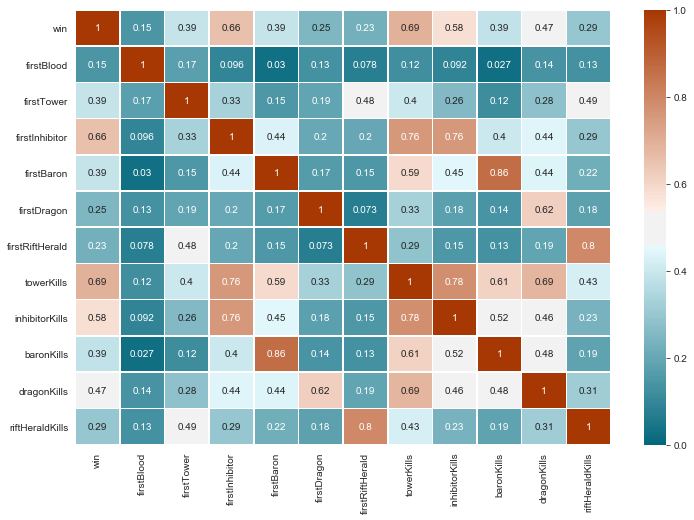

In [40]:
plt.figure(figsize = (12,8))
sns.heatmap(match_df[match_df.region == 'br1'].drop(['region'], axis = 1).corr(), vmin = 0, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')

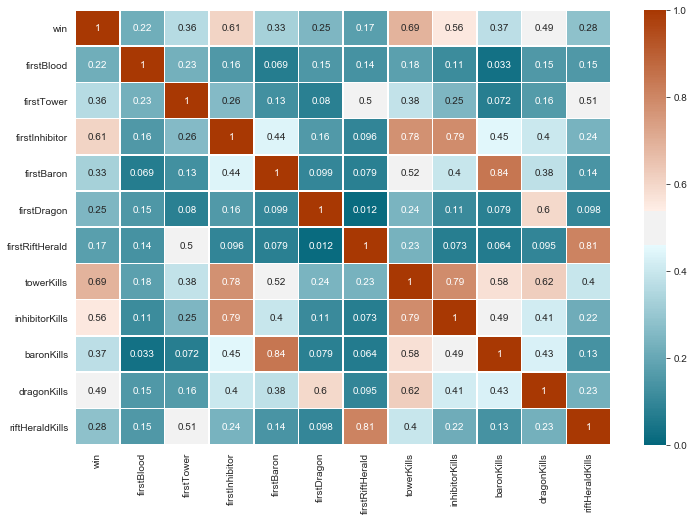

In [41]:
plt.figure(figsize = (12,8))
sns.heatmap(match_df[match_df.region == 'kr'].drop(['region'], axis = 1).corr(), vmin = 0, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')

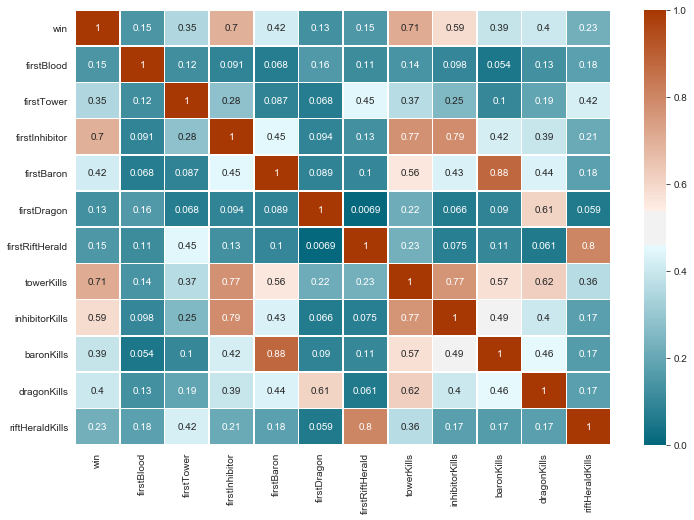

In [42]:
plt.figure(figsize = (12,8))
sns.heatmap(match_df[match_df.region == 'euw1'].drop(['region'], axis = 1).corr(), vmin = 0, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')

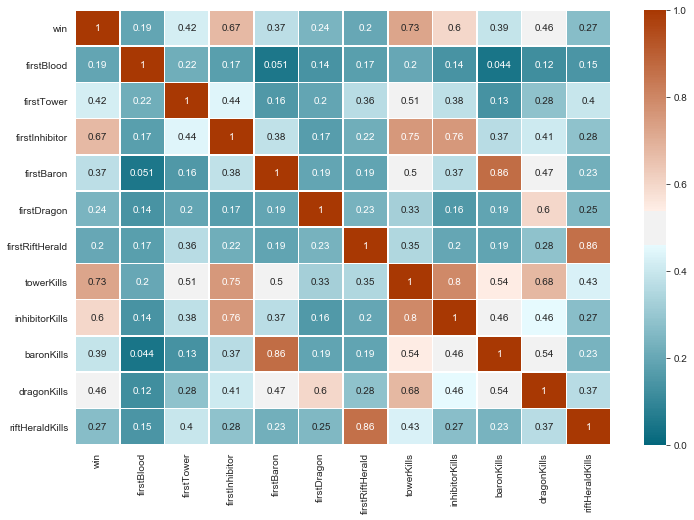

In [43]:
plt.figure(figsize = (12,8))
sns.heatmap(match_df[match_df.region == 'eun1'].corr(), vmin = 0, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [58]:
match_df

,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,region
0,0,0,0,0,0,0,0,0,0,0,0,0,na1
1,1,1,1,0,0,1,0,1,0,0,2,0,na1
2,0,0,0,0,0,0,0,0,0,0,0,0,na1
3,1,1,1,1,0,1,1,8,1,0,2,1,na1
4,1,1,1,1,0,1,0,10,2,0,1,0,na1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9221,0,0,0,0,0,0,0,0,0,0,0,0,eun1
9222,0,0,1,0,0,0,0,2,0,0,1,0,eun1
9223,1,1,0,1,1,1,1,7,1,1,3,1,eun1
9224,1,1,1,1,1,1,0,9,1,2,4,0,eun1


In [60]:
scaler = StandardScaler()
scaler.fit(match_df.drop(['win', 'region'], axis = 1))
scaled_data = scaler.transform(match_df.drop(['win', 'region'], axis=1))
scaled_data

array([[-0.99913326, -0.99244131, -0.7964714 , ..., -0.62371444,
        -1.15938506, -0.94860297],
       [ 1.00086749,  1.00761626, -0.7964714 , ..., -0.62371444,
         0.33255811, -0.94860297],
       [-0.99913326, -0.99244131, -0.7964714 , ..., -0.62371444,
        -1.15938506, -0.94860297],
       ...,
       [ 1.00086749, -0.99244131,  1.25553786, ...,  1.08992148,
         1.0785297 ,  0.40637628],
       [ 1.00086749,  1.00761626,  1.25553786, ...,  2.8035574 ,
         1.82450128, -0.94860297],
       [-0.99913326, -0.99244131, -0.7964714 , ..., -0.62371444,
        -0.41341347,  0.40637628]])

In [62]:
exp_var_ratio = []
for n in range(0,8):
    pca = PCA(n_components = n)
    pca.fit(scaled_data)
    pca.transform(scaled_data)
    exp_var_ratio.append(sum(pca.explained_variance_ratio_))

exp_var_ratio

[0,
 0.40486080420731807,
 0.5696060886737182,
 0.6815999552968989,
 0.779646201989236,
 0.860177072287346,
 0.9117611720883858,
 0.9405907525646877]

Text(0, 0.5, 'Ratio of Variance Explained')

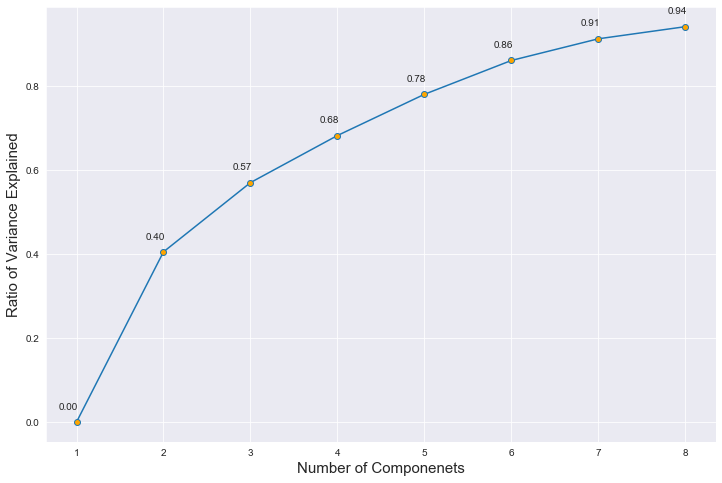

In [63]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.plot(range(1,9), exp_var_ratio, marker = 'o', markerfacecolor = 'orange', markersize = 6)
for i,j in zip(range(1,9),exp_var_ratio):
    ax.annotate('{:.2f}'.format(j),xy=(i-.2,j+.03))
plt.xlabel('Number of Componenets', size = 15)
plt.ylabel('Ratio of Variance Explained', size = 15)

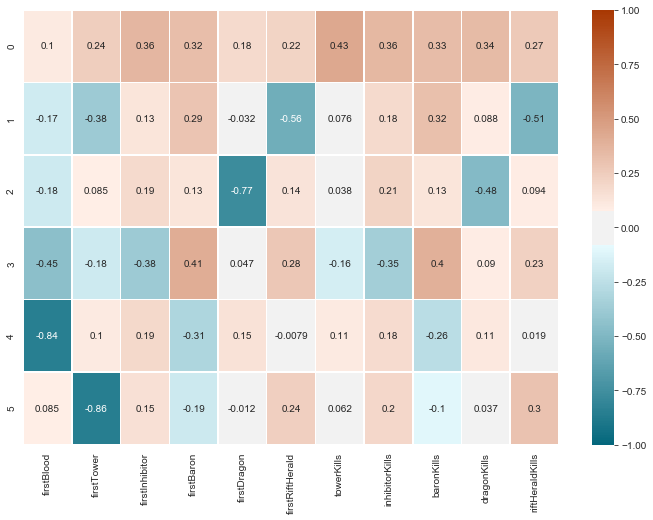

In [65]:
pca = PCA(n_components = 6)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

pca_corr = pd.DataFrame(pca.components_, columns = match_df.drop(['win', 'region'], axis = 1).columns)

plt.figure(figsize = (12,8))
sns.heatmap(pca_corr, cmap = cmap, vmin = -1, vmax = 1, annot = True, lw = .5, linecolor = 'white')

## Logistic Regression

For this final step, I will be performing a Logistic Regression on the overall dataset, as well as the data from each individual region. Then, I will compare the regression coefficients to understand what the most important win conditions for a game of League of Legends are, and whether or not this is consistent across all the regions accounted for in my data.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
X = match_df.drop(['win', 'region'], axis = 1)
y = match_df.win

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

log_coeff_tot = pd.Series(log.coef_[0], index = match_df.drop(['win', 'region'], axis = 1).columns)
print(log_coeff_tot)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1368
           1       0.88      0.82      0.85      1400

    accuracy                           0.85      2768
   macro avg       0.86      0.85      0.85      2768
weighted avg       0.86      0.85      0.85      2768

[[1213  155]
 [ 249 1151]]

firstBlood         0.341680
firstTower         0.893198
firstInhibitor     1.372865
firstBaron         0.223970
firstDragon        0.285656
firstRiftHerald    0.186730
towerKills         0.468161
inhibitorKills     0.158593
baronKills        -0.320805
dragonKills        0.103578
riftHeraldKills   -0.327020
dtype: float64


In [77]:
X = match_df[match_df.region == 'na1'].drop(['win', 'region'], axis = 1)
y = match_df[match_df.region == 'na1'].win

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

log_coeff_na = pd.Series(log.coef_[0], index = match_df.drop(['win', 'region'], axis = 1).columns)
print(log_coeff_na)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       303
           1       0.84      0.83      0.84       279

    accuracy                           0.85       582
   macro avg       0.85      0.84      0.85       582
weighted avg       0.85      0.85      0.85       582

[[260  43]
 [ 47 232]]

firstBlood         0.407424
firstTower         1.252272
firstInhibitor     1.986462
firstBaron         1.055010
firstDragon        0.924895
firstRiftHerald   -0.132288
towerKills         0.451542
inhibitorKills     0.651056
baronKills        -1.038161
dragonKills        0.201589
riftHeraldKills   -0.212597
dtype: float64


In [78]:
X = match_df[match_df.region == 'br1'].drop(['win', 'region'], axis = 1)
y = match_df[match_df.region == 'br1'].win

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

log_coeff_br = pd.Series(log.coef_[0], index = match_df.drop(['win', 'region'], axis = 1).columns)
print(log_coeff_br)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       279
           1       0.88      0.84      0.86       276

    accuracy                           0.86       555
   macro avg       0.86      0.86      0.86       555
weighted avg       0.86      0.86      0.86       555

[[246  33]
 [ 45 231]]

firstBlood         0.482114
firstTower         0.942659
firstInhibitor     1.157092
firstBaron        -0.037798
firstDragon        0.245041
firstRiftHerald    0.484386
towerKills         0.450493
inhibitorKills     0.312561
baronKills        -0.095854
dragonKills       -0.022236
riftHeraldKills   -0.500573
dtype: float64


In [79]:
X = match_df[match_df.region == 'kr'].drop(['win', 'region'], axis = 1)
y = match_df[match_df.region == 'kr'].win

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

log_coeff_kr = pd.Series(log.coef_[0], index = match_df.drop(['win', 'region'], axis = 1).columns)
print(log_coeff_kr)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       292
           1       0.85      0.76      0.80       307

    accuracy                           0.81       599
   macro avg       0.81      0.81      0.81       599
weighted avg       0.81      0.81      0.81       599

[[252  40]
 [ 75 232]]

firstBlood         0.637184
firstTower         1.058122
firstInhibitor     0.682226
firstBaron        -0.685710
firstDragon        0.451320
firstRiftHerald    0.164983
towerKills         0.472004
inhibitorKills     0.557367
baronKills         0.255827
dragonKills        0.211822
riftHeraldKills   -0.228113
dtype: float64


In [80]:
X = match_df[match_df.region == 'euw1'].drop(['win', 'region'], axis = 1)
y = match_df[match_df.region == 'euw1'].win

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

log_coeff_euw = pd.Series(log.coef_[0], index = match_df.drop(['win', 'region'], axis = 1).columns)
print(log_coeff_euw)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       252
           1       0.89      0.82      0.85       250

    accuracy                           0.86       502
   macro avg       0.86      0.86      0.86       502
weighted avg       0.86      0.86      0.86       502

[[227  25]
 [ 45 205]]

firstBlood         0.437823
firstTower         0.890748
firstInhibitor     1.902106
firstBaron         1.148662
firstDragon        0.059851
firstRiftHerald    0.044306
towerKills         0.513538
inhibitorKills    -0.015044
baronKills        -0.668050
dragonKills       -0.018830
riftHeraldKills   -0.301763
dtype: float64


In [83]:
X = match_df[match_df.region == 'eun1'].drop(['win', 'region'], axis = 1)
y = match_df[match_df.region == 'eun1'].win

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

log_coeff_eun = pd.Series(log.coef_[0], index = match_df.drop(['win', 'region'], axis = 1).columns)
print(log_coeff_eun)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       261
           1       0.88      0.80      0.84       271

    accuracy                           0.84       532
   macro avg       0.84      0.84      0.84       532
weighted avg       0.85      0.84      0.84       532

[[232  29]
 [ 55 216]]

firstBlood         0.412184
firstTower         0.493069
firstInhibitor     1.509817
firstBaron        -0.160211
firstDragon        0.268782
firstRiftHerald   -0.653887
towerKills         0.524594
inhibitorKills    -0.064378
baronKills         0.356230
dragonKills       -0.118523
riftHeraldKills    0.029707
dtype: float64


In [85]:
win_conditions_dict = dict()
win_conditions_dict['overall'] = log_coeff_tot
win_conditions_dict['na'] = log_coeff_na
win_conditions_dict['br'] = log_coeff_br
win_conditions_dict['kr'] = log_coeff_kr
win_conditions_dict['euw'] = log_coeff_euw
win_conditions_dict['eun'] = log_coeff_eun
win_conditions = pd.DataFrame(win_conditions_dict)
win_conditions

,overall,na,br,kr,euw,eun
firstBlood,0.341680,0.407424,0.482114,0.637184,0.437823,0.412184
firstTower,0.893198,1.252272,0.942659,1.058122,0.890748,0.493069
firstInhibitor,1.372865,1.986462,1.157092,0.682226,1.902106,1.509817
firstBaron,0.223970,1.055010,-0.037798,-0.685710,1.148662,-0.160211
firstDragon,0.285656,0.924895,0.245041,0.451320,0.059851,0.268782
firstRiftHerald,0.186730,-0.132288,0.484386,0.164983,0.044306,-0.653887
towerKills,0.468161,0.451542,0.450493,0.472004,0.513538,0.524594
inhibitorKills,0.158593,0.651056,0.312561,0.557367,-0.015044,-0.064378
baronKills,-0.320805,-1.038161,-0.095854,0.255827,-0.668050,0.356230
dragonKills,0.103578,0.201589,-0.022236,0.211822,-0.018830,-0.118523


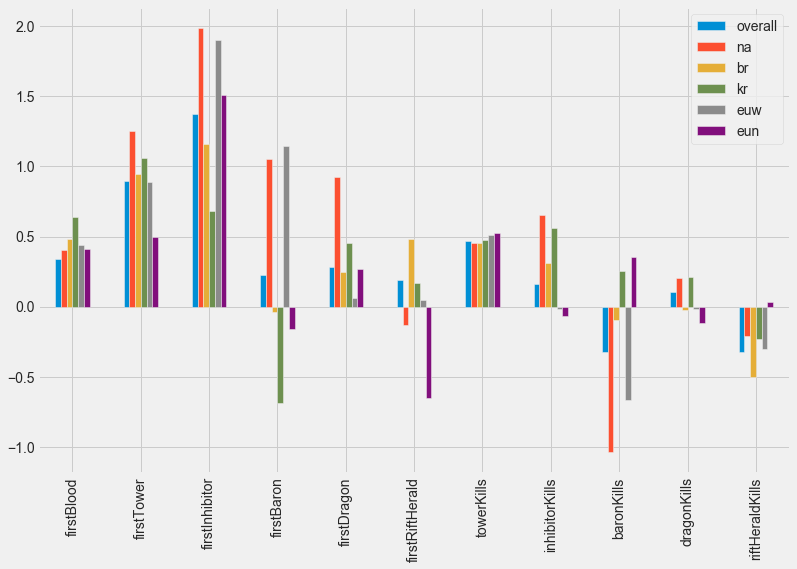

In [92]:
plt.style.use('fivethirtyeight')
win_conditions.plot(kind = 'bar', figsize = (12, 8))